### Read the .csv file

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
df = pd.read_csv('Student Performance.csv')

### KNN Model 4

<img src="Model 4.jpg" width=500 height=500 />

### Obtain the feature matrix and label

In [2]:
# convert these data into 2D numpy array
# order: math percentage, reading score percentage, writing score percentage
X = np.array([[df['math percentage'][0], 
              df['reading score percentage'][0], 
              df['writing score percentage'][0]]], 
             dtype = 'float')
for i in range(1,1000):
    X = np.append(X, [[df['math percentage'][i], 
                  df['reading score percentage'][i], 
                  df['writing score percentage'][i]]],axis=0)
print('feature matrix')
print(X)
print('size: ' + str(X.shape))
print()

# completed = 0, none = 1
if(df['test preparation course'][0] == 'completed'):
    first_elem = 0
else:
    first_elem = 1
    
y = np.array([first_elem], dtype = 'int')
for i in range(1,1000):
    if(df['test preparation course'][i] == 'completed'):
        y = np.append(y, 0)
    else:
        y = np.append(y, 1)
print('Labels')
print(y)
print('size: ' + str(y.shape))

feature matrix
[[0.72 0.72 0.74]
 [0.69 0.9  0.88]
 [0.9  0.95 0.93]
 ...
 [0.59 0.71 0.65]
 [0.68 0.78 0.77]
 [0.77 0.86 0.86]]
size: (1000, 3)

Labels
[1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1
 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1
 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1
 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0
 1 0 0 0 0 1 0 0 1 0 1

In [3]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split
# where X is all the sample data, y is all the labels
# random_state=1 means only random once and rest stay the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) # We can fix the random_state for reproducibility!

In [4]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(700, 3)
(700,)


In [5]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(300, 3)
(300,)


In [6]:
print(X_test)
print('\n')
print(y_test)

[[0.55 0.41 0.48]
 [0.44 0.54 0.53]
 [0.7  0.64 0.7 ]
 [0.6  0.59 0.54]
 [0.7  0.56 0.51]
 [0.92 0.79 0.84]
 [0.64 0.79 0.77]
 [0.86 0.81 0.75]
 [0.99 0.93 0.9 ]
 [0.78 0.77 0.77]
 [0.73 0.76 0.78]
 [0.33 0.41 0.43]
 [0.69 0.58 0.53]
 [0.65 0.78 0.82]
 [0.45 0.59 0.64]
 [0.59 0.65 0.66]
 [0.97 0.92 0.86]
 [0.57 0.69 0.68]
 [0.81 0.8  0.76]
 [0.63 0.6  0.57]
 [0.54 0.59 0.5 ]
 [0.62 0.67 0.69]
 [0.64 0.66 0.59]
 [0.81 0.72 0.77]
 [0.73 0.76 0.78]
 [0.36 0.29 0.27]
 [0.58 0.61 0.52]
 [0.5  0.48 0.53]
 [0.81 0.88 0.9 ]
 [0.62 0.68 0.68]
 [0.68 0.54 0.53]
 [0.53 0.71 0.67]
 [0.18 0.32 0.28]
 [0.69 0.58 0.57]
 [0.4  0.52 0.43]
 [0.63 0.55 0.63]
 [0.66 0.63 0.64]
 [0.65 0.7  0.71]
 [0.66 0.65 0.6 ]
 [0.61 0.47 0.56]
 [0.43 0.62 0.61]
 [0.5  0.48 0.42]
 [0.82 0.85 0.87]
 [0.6  0.7  0.74]
 [0.87 0.73 0.72]
 [0.82 0.85 0.86]
 [0.88 0.99 0.95]
 [0.64 0.73 0.68]
 [0.69 0.65 0.74]
 [0.66 0.72 0.7 ]
 [0.37 0.45 0.38]
 [0.52 0.57 0.56]
 [0.87 0.84 0.76]
 [0.52 0.7  0.62]
 [0.79 0.73 0.67]
 [0.78 0.8

In [7]:
from sklearn.metrics import accuracy_score
highest = 0
best_k = 0
for i in range(1,300):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    if(highest == 0):
        highest = accuracy
    elif(highest < accuracy):
        highest = accuracy
        best_k = i
    else:
        pass
print("The highest accuracy: " + str(highest))
print("When k= " + str(best_k))

The highest accuracy: 0.6833333333333333
When k= 64


#### Using Cross Validation on KNN algorithm to see if the model accuary can be improved

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

highest = 0
best_k = 0
for i in range(1,300):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    accuracy = scores.mean()
    if(highest == 0):
        highest = accuracy
    elif(highest < accuracy):
        highest = accuracy
        best_k = i
    else:
        pass
print("The highest accuracy: " + str(highest))
print("When k= " + str(best_k))

The highest accuracy: 0.708
When k= 29


In [9]:
k = 64
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=64)

In [10]:
# Predicting the Binary Label:
y_predict = knn.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = knn.predict_proba(X_test)

In [11]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob[:,1])

[0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 0
 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0
 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1
 1 0 1 0]
[1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 1 

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [12]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=0)

print(fpr)
print(tpr)

[0.         0.         0.04301075 0.10752688 0.18817204 0.24193548
 0.30107527 0.37634409 0.41935484 0.4516129  0.49462366 0.51075269
 0.55913978 0.57526882 0.60215054 0.61827957 0.64516129 0.68817204
 0.72580645 0.75268817 0.79032258 0.83333333 0.89784946 0.91935484
 0.93010753 0.94623656 0.95698925 0.95698925 0.96774194 0.98924731
 1.         1.        ]
[0.         0.00877193 0.01754386 0.02631579 0.02631579 0.07894737
 0.13157895 0.15789474 0.18421053 0.21052632 0.22807018 0.27192982
 0.31578947 0.33333333 0.35964912 0.39473684 0.42105263 0.44736842
 0.48245614 0.51754386 0.54385965 0.57017544 0.69298246 0.70175439
 0.76315789 0.8245614  0.86842105 0.9122807  0.92982456 0.97368421
 0.98245614 1.        ]


# AUC:

In [13]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.31701565742312776


# ROC Curve:

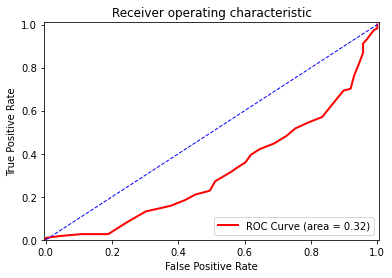

In [14]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Conclusion
### KNN model accuracy: 0.71 when k=29 with Cross Validation
### KNN model accuracy: 0.68 when k=64 without Cross Validation